In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel('sample_data (2).xlsx')

In [10]:
data

,FULL_DATE (Year > Week > Day),Digital OI Leads,Digital OI Wins,leads to win Expression (Digital OI)
0,"Week 01, 2017",2399,747,0.311380
1,"Week 02, 2017",4474,700,0.156460
2,"Week 03, 2017",3117,691,0.221688
3,"Week 04, 2017",5150,889,0.172621
4,"Week 05, 2017",3720,1369,0.368011
5,"Week 06, 2017",3913,718,0.183491
6,"Week 07, 2017",4053,805,0.198618
7,"Week 08, 2017",3951,894,0.226272
8,"Week 09, 2017",4951,1654,0.334074
9,"Week 10, 2017",6928,926,0.133661


In [11]:
plt.plot(data['NO_OF_WINS'])

KeyError: 'NO_OF_WINS'

In [ ]:
y = data['NO_OF_WINS']

In [6]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [7]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:498252.21468587307
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:493535.2980536194
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:599268.1982508721
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:471748.5644572659
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:492279.9378241902
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:471782.97196565004


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:543152.9362913923
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:471182.957999036
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:491212.9866584226
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:488284.48465272674
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:598823.7015624612
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:469970.0764339141
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:487625.7110775956


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:470415.5197450052
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:542562.9006824639
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:469561.38432571397
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:589038.3401905998
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:589006.4324485217
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:727973.9503974869
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:589081.6280954264
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:589009.3020651276
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:589008.457665536
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:670159.4930699684
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:589082.8630232859
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:465204.60771591065
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:465181.7520938626
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:599277.6159857346
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:465261.47321982327
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:465185.0222816685
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:465183.7756593815
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:543194.6467066696
ARIMA(0,

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:469743.8356265592
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:542520.3763951741
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:469336.1614435111
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:464951.60902816924
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:464925.85378566163
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:598617.2188383173
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:464094.7388946278
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:464927.4411491309
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:464913.214161514
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:542050.3286229939
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:464092.6332883386
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:534091.6692830893
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:534062.0416019525
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:673349.7258629622
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:534138.4008904776
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:534062.0853130114
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:534064.0713043952
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:615296.5032162104
ARIMA(1, 

In [8]:
mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:464859.1191116356


In [24]:
#
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0854      0.152     -0.564      0.573      -0.382       0.212
ma.L1         -1.0006      4.721     -0.212      0.832     -10.253       8.252
ar.S.L12       0.0848      0.160      0.529      0.597      -0.230       0.399
ma.S.L12      -1.0371      1.338     -0.775      0.438      -3.659       1.585
sigma2      4.581e+05   2.21e+06      0.207      0.836   -3.87e+06    4.79e+06


In [25]:
import statsmodels.api as sm

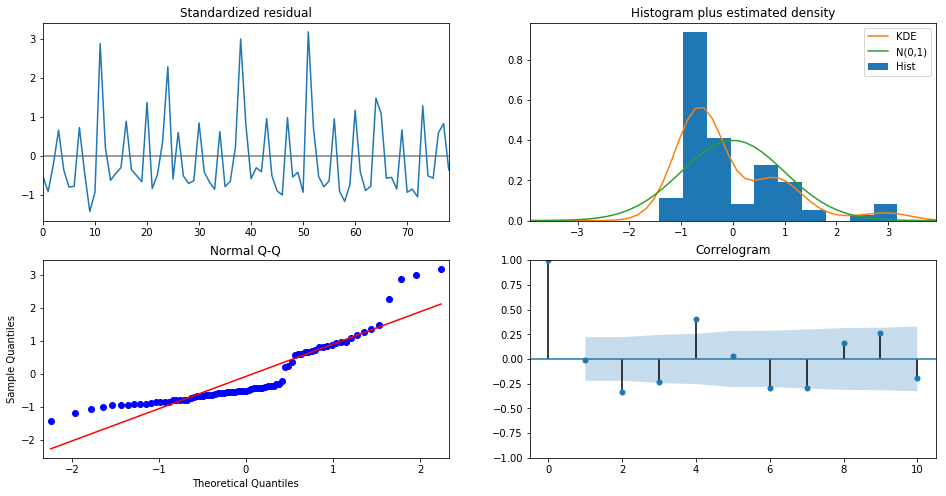

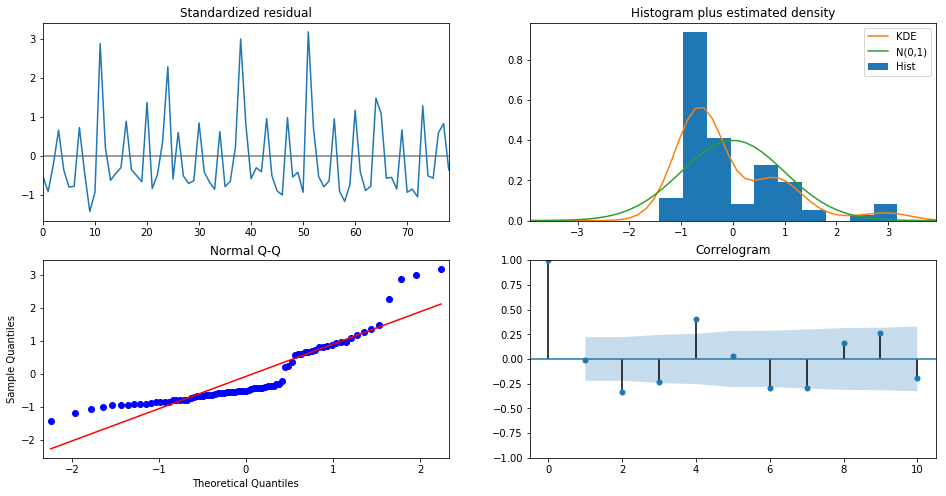

In [26]:
results.plot_diagnostics(figsize=(16, 8))

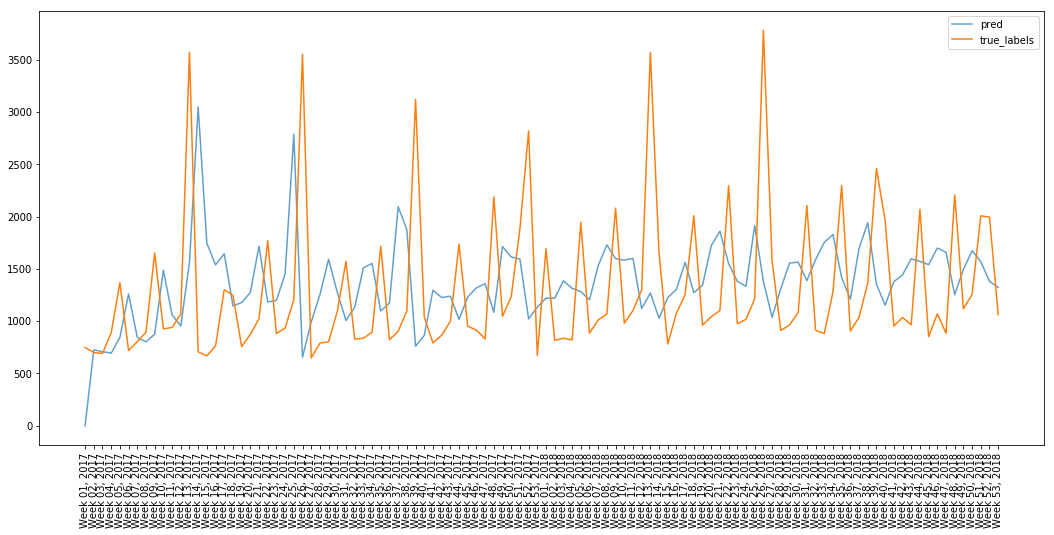

In [27]:
pred = results.get_prediction(start=0, dynamic=False)
pred.predicted_mean.plot(label='pred', alpha=.7, figsize=(18, 8))
plt.plot(data['Digital OI Wins'], label='true_labels')
plt.xticks(range(data.shape[0]), data['FULL_DATE (Year > Week > Day)'], rotation=90)
plt.legend()

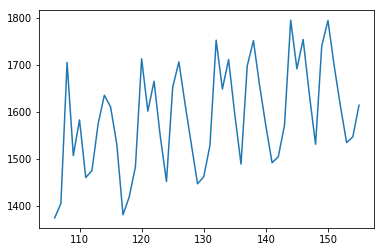

In [28]:
pred_uc = results.get_forecast(steps=50)
pred_uc.predicted_mean.plot(label='Forecast')

In [29]:
pred_uc = results.get_forecast(steps=20)
prediction = pred_uc.predicted_mean

In [30]:
prediction

106    1373.572549
107    1404.218816
108    1704.945970
109    1506.460096
110    1582.518883
111    1459.766440
112    1474.260759
113    1574.213842
114    1635.081527
115    1610.293236
116    1531.097335
117    1380.329125
118    1418.221765
119    1482.436153
120    1712.766184
121    1601.136088
122    1664.978137
123    1547.672953
124    1451.167256
125    1651.901642
dtype: float64